## Classifying the Adult Dataset


**Author: Luana Passos Reis**


*Course PMR3508 - Machine Learning and Pattern Recognition at University of São Paulo*

In this notebook, I have produced 5 different Classifiers for the variable Target (that is, whether the income is <= 50K or > 50K) for the Adult Dataset.

The classifiers chosen were:
* k-Nearest Neighbors
* Support Vector Machine
* Logistic Regression
* Random Forest
* Boosting

The Adult dataset that can be found in here -> https://archive.ics.uci.edu/ml/index.php

# Dataset description 

We have a few **continuous variables**, such as:

- age,
- fnlwgt,
- education-num,
- capital-gain,
- capital-loss,
- hours-per-week,

and a few **discrete** ones:

- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.


# Import libraries

First, a few common imports for data analysis.

Some other imports that are important fot a determined specific analysis are going to be imported throughout the notebook.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

# Import dataset

Let's start by loading the datasets.

In [2]:
train_df = pd.read_csv("/Users/luanareis/Documents/Classf_ML/train_data.csv")

test_df = pd.read_csv("/Users/luanareis/Documents/Classf_ML/test_data.csv")

# Exploratory Data Analysis

Explore the data to gain insights about it.

In [3]:
train_df.shape

(32560, 16)

We can see that there are 32560 instances and 16 variables in the data set.

In [4]:
test_df.shape

(16280, 15)

We can see that there are 16280 instances and 15 variables in the data set.

In [5]:
## Let's preview the training dataset

train_df.head()

,Id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,16280,34,Private,204991,Some-college,10,Divorced,Exec-managerial,Own-child,White,Male,0,0,44,United-States,<=50K
1,16281,58,Local-gov,310085,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
2,16282,25,Private,146117,Some-college,10,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,42,United-States,<=50K
3,16283,24,Private,138938,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
4,16284,57,Self-emp-inc,258883,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,5178,0,60,Hungary,>50K


In [6]:
## Now the testing dataset

test_df.head()

,Id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,0,25,Private,120596,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,44,United-States
1,1,64,State-gov,152537,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States
2,2,31,Private,100135,Masters,14,Divorced,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States
3,3,45,Private,189123,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States
4,4,64,Self-emp-inc,487751,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States


We can see that there are 16 variables in the dataset. 7 are continuous variables and 9 are discrete variable. There is a discrete variable that is target_class variable. It is also the target variable (the "income").


Now, I will view the column names.

In [7]:
train_df.columns

Index(['Id', 'age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [8]:
test_df.columns

Index(['Id', 'age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country'],
      dtype='object')

Our target variable is the "income" column. So, I will check its distribution.

In [9]:
train_df['income'].value_counts()

<=50K    24719
>50K      7841
Name: income, dtype: int64

In [10]:
## View the percentage distribution of the target class column (Income)

train_df['income'].value_counts()/np.float64(len(train_df))

<=50K    0.759183
>50K     0.240817
Name: income, dtype: float64

We have 75,9% of people who makes <=50K and 24,1% for >50K.

In [11]:
## View summary of dataset

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              32560 non-null  int64 
 1   age             32560 non-null  int64 
 2   workclass       32560 non-null  object
 3   fnlwgt          32560 non-null  int64 
 4   education       32560 non-null  object
 5   education.num   32560 non-null  int64 
 6   marital.status  32560 non-null  object
 7   occupation      32560 non-null  object
 8   relationship    32560 non-null  object
 9   race            32560 non-null  object
 10  sex             32560 non-null  object
 11  capital.gain    32560 non-null  int64 
 12  capital.loss    32560 non-null  int64 
 13  hours.per.week  32560 non-null  int64 
 14  native.country  32560 non-null  object
 15  income          32560 non-null  object
dtypes: int64(7), object(9)
memory usage: 4.0+ MB


We can start by looking at some simple initial statistics about our data!

In [12]:
train_df.describe()

,Id,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,32559.500000,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,9399.406719,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,16280.000000,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,24419.750000,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,32559.500000,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,40699.250000,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,48839.000000,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


We can see some information about the continuous features, as the mean, standard deviation, the minimum, maximum and in between values of the entire dataset.


## Exploring missing values in variables

In [13]:
## Checking for missing values in variables

train_df.isnull().sum()

Id                0
age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

Let's remove the lines that are duplicate.

In [14]:
train_df = train_df.drop_duplicates()

test_df = test_df.drop_duplicates()

In [15]:
train_df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

Seems like the missing values have a "?" instead of "nan", so we must solve that. For now, we may only replace them, later on we will input on those spaces. Let's first analyze which variables are not that relevant on predicting the income.

In [16]:
## Replacing the missing values with "nan"

train_df = train_df.replace('?', np.nan)

test_df = test_df.replace('?', np.nan)

In [17]:
train_df.isna().sum()

Id                   0
age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [18]:
test_df.isna().sum()

Id                  0
age                 0
workclass         963
fnlwgt              0
education           0
education.num       0
marital.status      0
occupation        966
relationship        0
race                0
sex                 0
capital.gain        0
capital.loss        0
hours.per.week      0
native.country    274
dtype: int64

## Evaluating each variable

In [19]:
## Setting the color palette

sns.set_palette(sns.color_palette('Set2'))

### Continuous Variables

We should suspect that all the continuous variables may contain outliers. Drawing boxplots is a way to visualise those outliers.

Text(0, 0.5, 'Number of people')

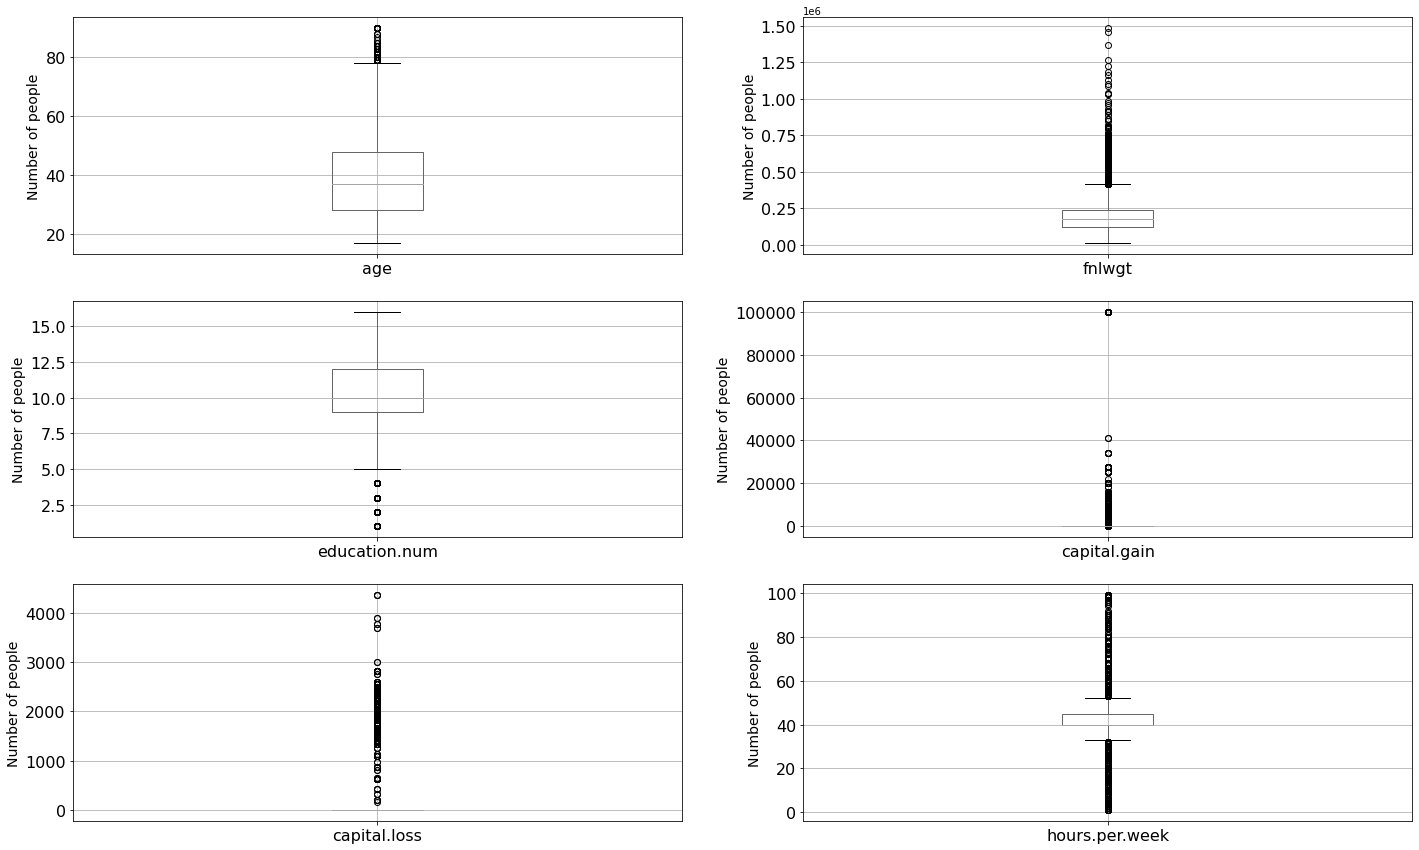

In [20]:
## Draw boxplots to visualize outliers

plt.figure(figsize=(24,20))


## Age
plt.subplot(4, 2, 1)
fig = train_df.boxplot(column='age', fontsize=16)
fig.set_title('')
fig.set_ylabel('Number of people', fontsize=14)


## Fnlwgt
plt.subplot(4, 2, 2)
fig = train_df.boxplot(column='fnlwgt', fontsize=16)
fig.set_title('')
fig.set_ylabel('Number of people', fontsize=14)


## Education Num
plt.subplot(4, 2, 3)
fig = train_df.boxplot(column='education.num', fontsize=16)
fig.set_title('')
fig.set_ylabel('Number of people', fontsize=14)


## Capital Gain
plt.subplot(4, 2, 4)
fig = train_df.boxplot(column='capital.gain', fontsize=16)
fig.set_title('')
fig.set_ylabel('Number of people', fontsize=14)


## Capital Loss
plt.subplot(4, 2, 5)
fig = train_df.boxplot(column='capital.loss', fontsize=16)
fig.set_title('')
fig.set_ylabel('Number of people', fontsize=14)


## Hours Per Week
plt.subplot(4, 2, 6)
fig = train_df.boxplot(column='hours.per.week', fontsize=16)
fig.set_title('')
fig.set_ylabel('Number of people', fontsize=14)

<AxesSubplot:xlabel='income', ylabel='hours.per.week'>

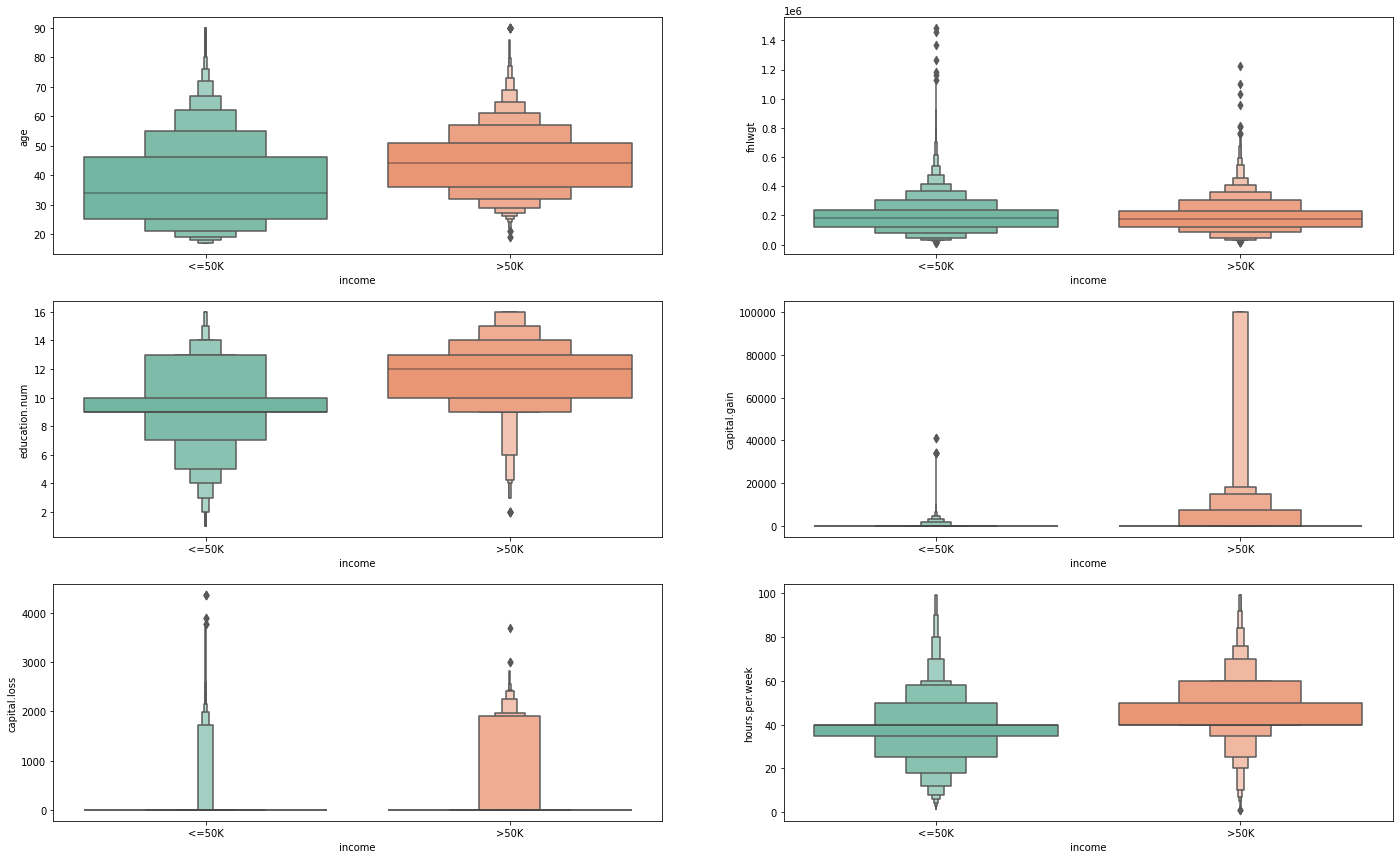

In [21]:
## Another type of boxplots to visualize as a function of the Income

plt.figure(figsize=(24,20))


## Age
plt.subplot(4, 2, 1)
sns.boxenplot(data=train_df, x='income', y='age')


## Fnlwgt
plt.subplot(4, 2, 2)
sns.boxenplot(data=train_df, x='income', y='fnlwgt')


## Education Num
plt.subplot(4, 2, 3)
sns.boxenplot(data=train_df, x='income', y='education.num')


## Capital Gain
plt.subplot(4, 2, 4)
sns.boxenplot(data=train_df, x='income', y='capital.gain')


## Capital Loss
plt.subplot(4, 2, 5)
sns.boxenplot(data=train_df, x='income', y='capital.loss')


## Hours Per Week
plt.subplot(4, 2, 6)
sns.boxenplot(data=train_df, x='income', y='hours.per.week')

Checking the distribution of variables to find out if they are normal or skewed.

Text(0, 0.5, 'Number of people')

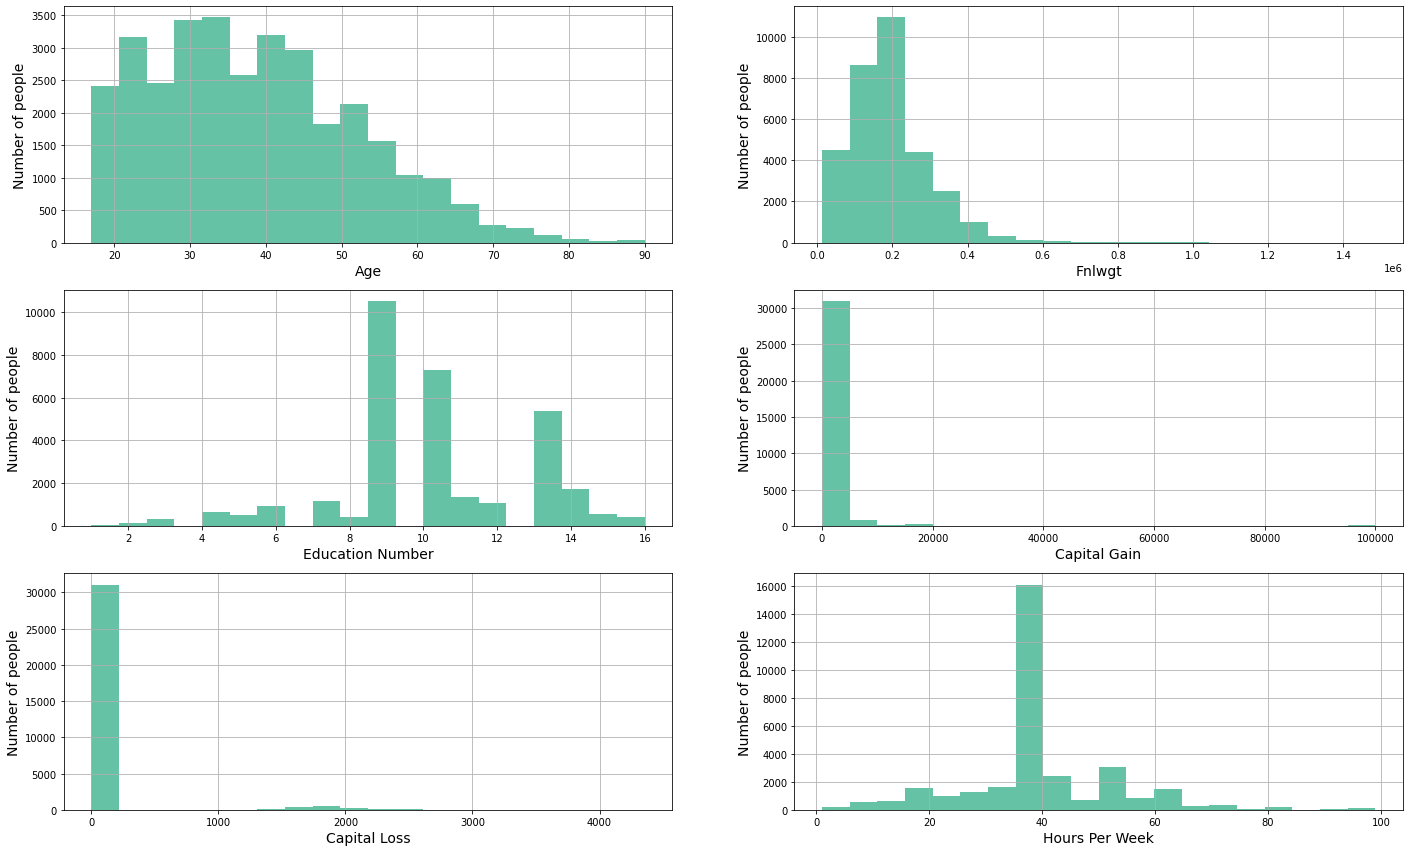

In [22]:
## Plot histogram to check distribution

plt.figure(figsize=(24,20))


## Age
plt.subplot(4, 2, 1)
fig = train_df['age'].hist(bins=20)
fig.set_xlabel('Age', fontsize=14)
fig.set_ylabel('Number of people', fontsize=14)


## Fnlwgt
plt.subplot(4, 2, 2)
fig = train_df['fnlwgt'].hist(bins=20)
fig.set_xlabel('Fnlwgt', fontsize=14)
fig.set_ylabel('Number of people', fontsize=14)


## Education Num
plt.subplot(4, 2, 3)
fig = train_df['education.num'].hist(bins=20)
fig.set_xlabel('Education Number', fontsize=14)
fig.set_ylabel('Number of people', fontsize=14)


## Capital Gain
plt.subplot(4, 2, 4)
fig = train_df['capital.gain'].hist(bins=20)
fig.set_xlabel('Capital Gain', fontsize=14)
fig.set_ylabel('Number of people', fontsize=14)


## Capital Loss
plt.subplot(4, 2, 5)
fig = train_df['capital.loss'].hist(bins=20)
fig.set_xlabel('Capital Loss', fontsize=14)
fig.set_ylabel('Number of people', fontsize=14)


## Hours Per Week
plt.subplot(4, 2, 6)
fig = train_df['hours.per.week'].hist(bins=20)
fig.set_xlabel('Hours Per Week', fontsize=14)
fig.set_ylabel('Number of people', fontsize=14)

We should remove the variables that may not be essencial for this classification.

In [23]:
## Where 1 is the axis number (0 for rows and 1 for columns.)

train_df = train_df.drop('Id', axis=1)

# test_df = test_df.drop('Id', axis=1)

I'll delete the columns 'fnlwgt' and 'capital.loss'.

In [24]:
train_df = train_df.drop('fnlwgt', axis=1)

test_df = test_df.drop('fnlwgt', axis=1)

In [25]:
train_df = train_df.drop('capital.loss', axis=1)

test_df = test_df.drop('capital.loss', axis=1)

### Discrete Variables

<AxesSubplot:title={'center':'Sex'}>

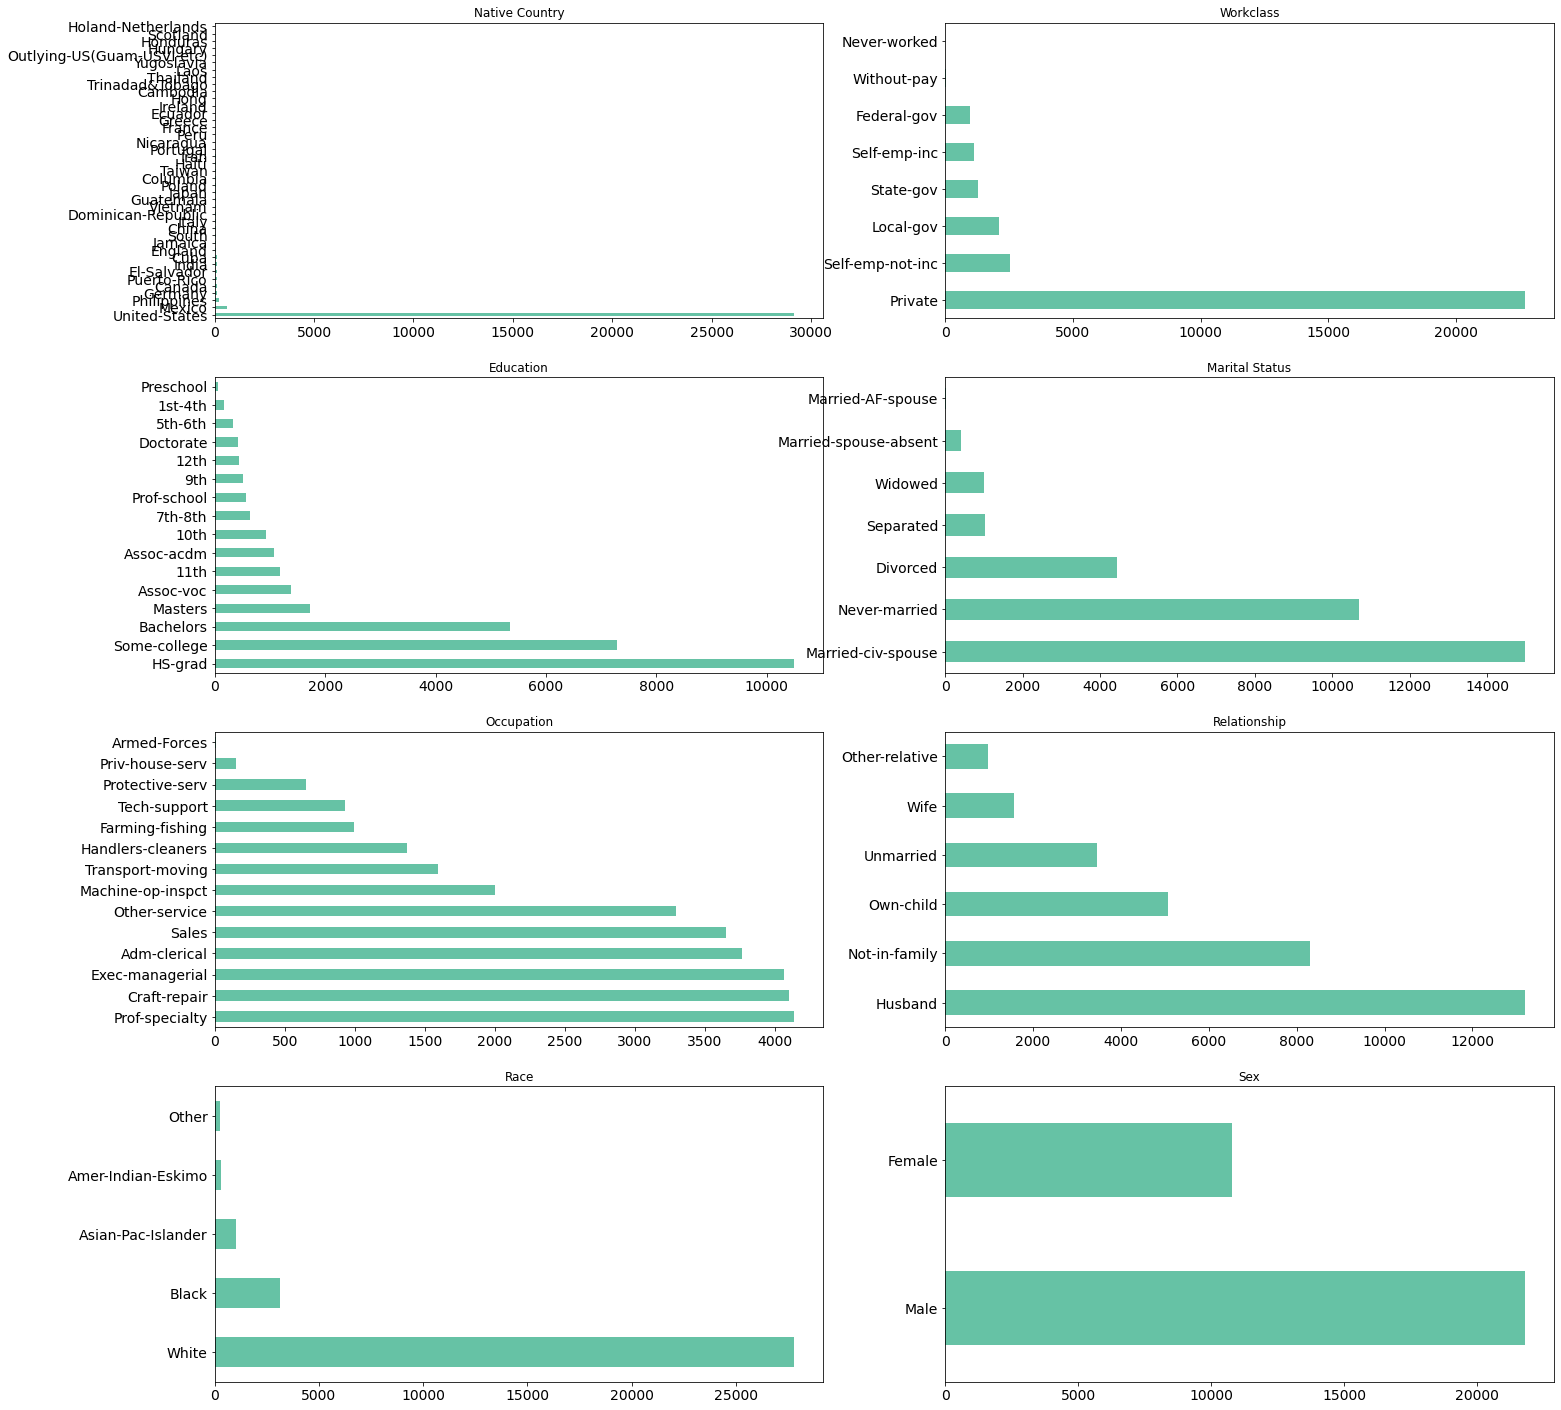

In [26]:
## Bar plotting the features

plt.figure(figsize=(24,25))


## Native Country
plt.subplot(4, 2, 1)
train_df['native.country'].value_counts().plot(kind='barh', title='Native Country', fontsize=14)


## Workclass
plt.subplot(4, 2, 2)
train_df['workclass'].value_counts().plot(kind='barh', title='Workclass', fontsize=14)


## Education
plt.subplot(4, 2, 3)
train_df['education'].value_counts().plot(kind='barh', title='Education', fontsize=14)


## Marital Status
plt.subplot(4, 2, 4)
train_df['marital.status'].value_counts().plot(kind='barh', title='Marital Status', fontsize=14)


## Occupation
plt.subplot(4, 2, 5)
train_df['occupation'].value_counts().plot(kind='barh', title='Occupation', fontsize=14)


## Relationship
plt.subplot(4, 2, 6)
train_df['relationship'].value_counts().plot(kind='barh', title='Relationship', fontsize=14)


## Race
plt.subplot(4, 2, 7)
train_df['race'].value_counts().plot(kind='barh', title='Race', fontsize=14)


## Sex
plt.subplot(4, 2, 8)
train_df['sex'].value_counts().plot(kind='barh', title='Sex', fontsize=14)

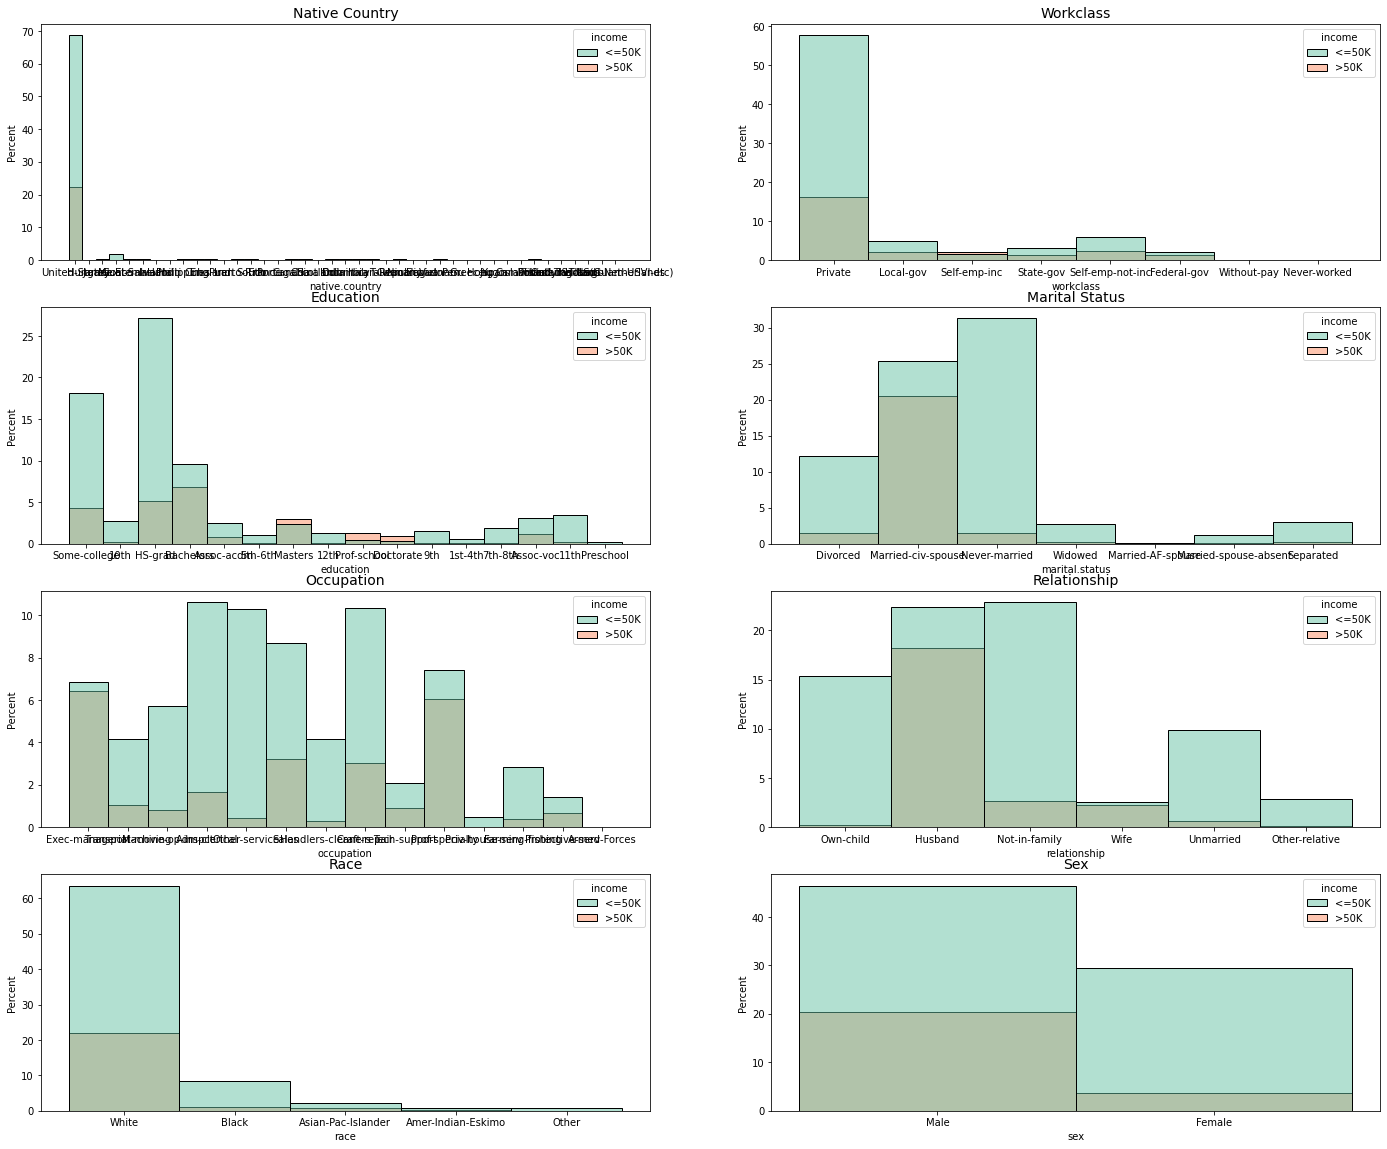

In [27]:
## A Histogram survey

plt.figure(figsize=(24,20))


## Native Country
plt.subplot(4, 2, 1)
sns.histplot(data=train_df, x='native.country', multiple='layer', kde=False, stat='percent', hue='income')
plt.title('Native Country', fontsize=14)


## Workclass
plt.subplot(4, 2, 2)
sns.histplot(data=train_df, x='workclass', multiple='layer', kde=False, stat='percent', hue='income')
plt.title('Workclass', fontsize=14)


## Education
plt.subplot(4, 2, 3)
sns.histplot(data=train_df, x='education', multiple='layer', kde=False, stat='percent', hue='income')
plt.title('Education', fontsize=14)


## Marital Status
plt.subplot(4, 2, 4)
sns.histplot(data=train_df, x='marital.status', multiple='layer', kde=False, stat='percent', hue='income')
plt.title('Marital Status', fontsize=14)


## Occupation
plt.subplot(4, 2, 5)
sns.histplot(data=train_df, x='occupation', multiple='layer', kde=False, stat='percent', hue='income')
plt.title('Occupation', fontsize=14)


## Relationship
plt.subplot(4, 2, 6)
sns.histplot(data=train_df, x='relationship', multiple='layer', kde=False, stat='percent', hue='income')
plt.title('Relationship', fontsize=14)


## Race
plt.subplot(4, 2, 7)
sns.histplot(data=train_df, x='race', multiple='layer', kde=False, stat='percent', hue='income')
plt.title('Race', fontsize=14)


## Sex
plt.subplot(4, 2, 8)
sns.histplot(data=train_df, x='sex', multiple='layer', kde=False, stat='percent', hue='income')
plt.title('Sex', fontsize=14)


plt.show()

Let's start by the Native Country variable.

In [28]:
## Native Country

train_df['native.country'].value_counts()

United-States                 29169
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

In [29]:
## View the percentage distribution of the Native Country column

train_df['native.country'].value_counts()/np.float64(len(train_df))

United-States                 0.895854
Mexico                        0.019748
Philippines                   0.006081
Germany                       0.004208
Canada                        0.003716
Puerto-Rico                   0.003501
El-Salvador                   0.003256
India                         0.003071
Cuba                          0.002918
England                       0.002764
Jamaica                       0.002488
South                         0.002457
China                         0.002303
Italy                         0.002242
Dominican-Republic            0.002150
Vietnam                       0.002058
Guatemala                     0.001966
Japan                         0.001904
Poland                        0.001843
Columbia                      0.001812
Taiwan                        0.001566
Haiti                         0.001351
Iran                          0.001321
Portugal                      0.001136
Nicaragua                     0.001044
Peru                     

WOW! We can clearly see that we have WAY more data of people from the United States than all of the other countries! There are 89,5% of people from USA, while there are 1,9% of people from Mexico, and it's the 2nd one with the largest number of people in this dataset. Clearly, it should not be a relevant factor, so we can delete it.

In [30]:
## Eliminating this column

train_df = train_df.drop('native.country', axis=1)

test_df = test_df.drop('native.country', axis=1)

There are other variables that I'll eliminate.

In [31]:
train_df = train_df.drop('sex', axis=1)

test_df = test_df.drop('sex', axis=1) 

In [32]:
train_df = train_df.drop('race', axis=1)

test_df = test_df.drop('race', axis=1)

Those are the columns that remain. Let's analyze them by correlating variables to see if we can delete another column.

In [33]:
train_df.columns

Index(['age', 'workclass', 'education', 'education.num', 'marital.status',
       'occupation', 'relationship', 'capital.gain', 'hours.per.week',
       'income'],
      dtype='object')

In [34]:
test_df.columns

Index(['Id', 'age', 'workclass', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'capital.gain',
       'hours.per.week'],
      dtype='object')

### Correlations between continuous and discrete variables

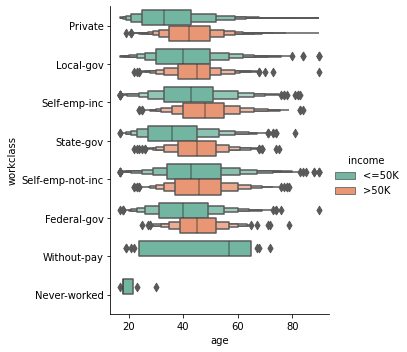

In [35]:
## Looking for correlations between age and workclass

sns.catplot(data=train_df, x="age", y="workclass", hue="income", kind="boxen")

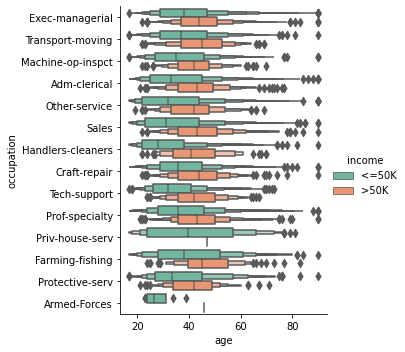

In [36]:
## age and occupation

sns.catplot(data=train_df, x="age", y="occupation", hue="income", kind="boxen")

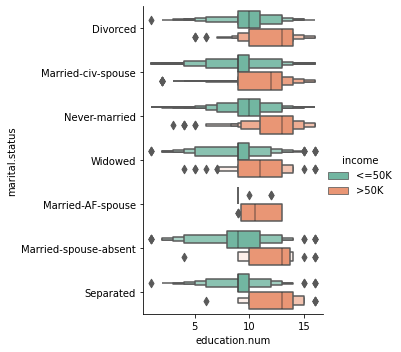

In [37]:
## education.num and marital.status

sns.catplot(data=train_df, x="education.num", y="marital.status", hue="income", kind="boxen")

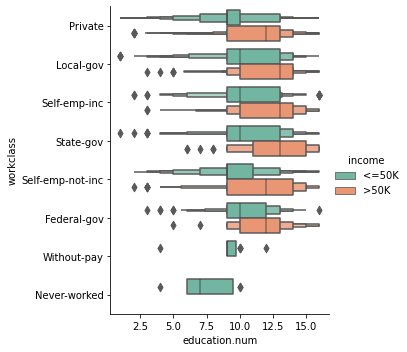

In [38]:
## education.num and workclass

sns.catplot(data=train_df, x="education.num", y="workclass", hue="income", kind="boxen")

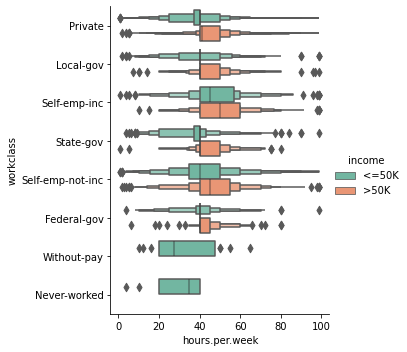

In [39]:
## hours.per.week and workclass

sns.catplot(data=train_df, x="hours.per.week", y="workclass", hue="income", kind="boxen")

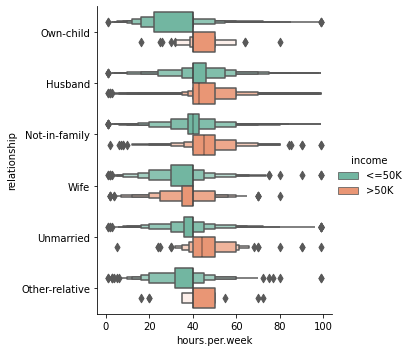

In [40]:
## workclass and relationship

sns.catplot(data=train_df, x="hours.per.week", y="relationship", hue="income", kind="boxen")

# Data Prep

Importing the LabelEncoder, KNNImputer and StandardScaler for the Data Preparation

In [41]:
from sklearn.preprocessing import LabelEncoder 
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

In [42]:
train_df.isna().sum()

age                  0
workclass         1836
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
capital.gain         0
hours.per.week       0
income               0
dtype: int64

In [43]:
test_df.isna().sum()

Id                  0
age                 0
workclass         963
education           0
education.num       0
marital.status      0
occupation        966
relationship        0
capital.gain        0
hours.per.week      0
dtype: int64

## Encoding discrete variables into continuous variables

In [44]:
label_encoder = LabelEncoder()

columns_encoder = ['income', 'workclass', 'education', 'marital.status', 'occupation', 'relationship']

for column in columns_encoder:
    train_df[column] = label_encoder.fit_transform(train_df[column].astype(str))
    if column != 'income' :
        test_df[column] = label_encoder.fit_transform(test_df[column].astype(str))

In [45]:
train_df.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,capital.gain,hours.per.week,income
0,34,3,15,10,0,3,3,0,44,0
1,58,1,0,6,2,13,0,0,40,0
2,25,3,15,10,4,6,1,0,42,0
3,24,3,15,10,0,0,1,0,40,0
4,57,4,11,9,2,13,0,5178,60,1


## Imputating the missing values

Checking if there are any remaining missing values

In [46]:
## Imputing values

imput = KNNImputer(n_neighbors=5)

## Train Dataset
train_df[['occupation', 'workclass']] = imput.fit_transform(train_df[['occupation', 'workclass']])

## Test Dataset
test_df[['occupation', 'workclass']] = imput.fit_transform(test_df[['occupation', 'workclass']])

## Scaling the features

In [47]:
scale = StandardScaler()

Standard_scaler = ['age', 'workclass', 'education', 'education.num', 'marital.status', 
                   'occupation', 'relationship', 'capital.gain', 'hours.per.week']


train_df[Standard_scaler] = scale.fit_transform(train_df[Standard_scaler])

test_df[Standard_scaler] = scale.fit_transform(test_df[Standard_scaler])

In [48]:
train_df.columns

Index(['age', 'workclass', 'education', 'education.num', 'marital.status',
       'occupation', 'relationship', 'capital.gain', 'hours.per.week',
       'income'],
      dtype='object')

In [49]:
test_df.columns

Index(['Id', 'age', 'workclass', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'capital.gain',
       'hours.per.week'],
      dtype='object')

# Classifying in different ways

Let's define empty lists in which we fill with the name of the classifier, the accuracy and error rate, so

In [51]:
classifier_list = []
accuracy_list = []
error_rate_list = []

First, let's set the variables we are training, testing and predicting.

In [52]:
## Input
X_train = train_df.iloc[:, train_df.columns != 'income']
X_test = test_df

## Output: Income - target variable
y_train = train_df.iloc[:, train_df.columns == 'income']

## Classifier 0: K- Nearest Neighbors (last Assignment)

In [53]:
## Imports

from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

We will select k through cross validation for the k-NN.

### Cross Validation for the Hyperparameter k

In [54]:
knn = KNeighborsClassifier()

## Defining parameter range
range_k = np.arange(13, 25, 5)

parameter_grid = dict(n_neighbors=range_k)
  
## Search for the best hyperparameter k
grid = GridSearchCV(knn, parameter_grid, cv=5, scoring='accuracy', return_train_score=True, verbose=1)
  
## Fit classifier to training set using grid search
grid_search = grid.fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 3 candidates, totalling 15 fits


In [55]:
print('the best k parameter is:', grid_search.best_params_)

the best k parameter is: {'n_neighbors': 23}


### Scores from hyperparameter cross validation

In [56]:
accuracy = grid_search.best_score_ *100
print("accuracy: {:.2f}% \n".format(accuracy) )

error_rate = (1 - accuracy/100)*100
print("error rate: {:.2f}%".format(error_rate) )

accuracy: 84.24% 

error rate: 15.76%


### Evaluating the Classifier

Since we don't have the testing labels (the Income for the testing dataset). We have to evaluate how well our classifier works through cross-validation.

In [57]:
## Instantiate classifier with n_neighbors=23
knn = KNeighborsClassifier(n_neighbors=23)

## Defining the scores we want
scoring = {'acc': 'accuracy', 'prec_macro': 'precision_macro', 'rec_macro': 'recall_macro', 'f1' : 'f1_macro'}

## Fitting classifier to training set and evaluating through cross validation
scores = cross_validate(knn, X_train, y_train.values.ravel(), scoring=scoring, cv=5)

In [58]:
## Scores

accuracy = scores['test_acc'].mean()*100
print('accuracy: {:.2f}%'.format(accuracy))

error_rate = (1 - accuracy/100)*100
print('error rate: {:.2f}% \n'.format(error_rate))

precision = scores['test_prec_macro'].mean()*100
print('precision: {:.2f}%'.format(precision))

recall = scores['test_rec_macro'].mean()*100
print('recall: {:.2f}%'.format(recall))

f1_score = scores['test_f1'].mean()
print('F1 score: {:.2f}'.format(f1_score))

accuracy: 84.24%
error rate: 15.76% 

precision: 79.21%
recall: 75.52%
F1 score: 0.77


In [59]:
classifier_list.append('kNN')
accuracy_list.append(accuracy)
error_rate_list.append(error_rate)

## Classifier 1: SVM - Suppor Vector Machine

In [63]:
## Imports

from sklearn.svm import SVC

### Fitting and Predicting

In [64]:
## Instantiate classifier with default hyperparameters

svc = SVC()

In [65]:
## Fit classifier to training set

svc.fit(X_train,y_train.values.ravel())

SVC()

In [66]:
## Make predictions on test set

# y_pred = svc.predict(X_test.iloc[:, test_df.columns != 'Id'])

### Evaluating the Classifier through Cross Validation

In [67]:
## Instantiate classifier with default hyperparameters
svc = SVC()

## Defining the scores we want
scoring = {'acc': 'accuracy', 'prec_macro': 'precision_macro', 'rec_macro': 'recall_macro', 'f1' : 'f1_macro'}

## Fitting classifier to training set and evaluating through cross validation
scores = cross_validate(svc, X_train, y_train.values.ravel(), scoring=scoring, cv=5)

In [68]:
## Scores

accuracy = scores['test_acc'].mean()*100
print('accuracy: {:.2f}%'.format(accuracy))

error_rate = (1 - accuracy/100)*100
print('error rate: {:.2f}% \n'.format(error_rate))

precision = scores['test_prec_macro'].mean()*100
print('precision: {:.2f}%'.format(precision))

recall = scores['test_rec_macro'].mean()*100
print('recall: {:.2f}%'.format(recall))

f1_score = scores['test_f1'].mean()
print('F1 score: {:.2f}'.format(f1_score))

accuracy: 84.52%
error rate: 15.48% 

precision: 80.86%
recall: 73.79%
F1 score: 0.76


### Tuning by searching for the best hyperparameters through GridSearch Cross Validation

This was taking way too much time, therefore, we used a smaller range

In [158]:
# ## Instantiate classifier with default hyperparameters
# svc = SVC()

# ## Declare parameters for hyperparameter tuning
# parameters = [ {'C':[1, 100], 'kernel':['linear']},
#                {'C':[1, 100], 'kernel':['rbf'], 'gamma':[0.3, 0.7]},
#                {'C':[1, 100,], 'kernel':['poly'], 'degree': [3] ,'gamma':[0.01, 0.05]} 
#               ]

# ## Search for best hyperparameter
# grid = GridSearchCV(estimator = svc, param_grid = parameters, scoring = 'accuracy', cv = 5, n_jobs = -1, verbose = 0, )

# ## Fit
# grid_search = grid.fit(X_train, y_train.values.ravel())

In [159]:
# ## Best score achieved during the GridSearchCV
# print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

It took way too long to run this cell above, I'll comment it to upload faster, here is a screenshot of the output:

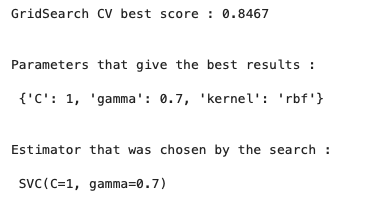

### Evaluating the Classifier

In [72]:
svc = SVC(C=1, gamma=0.7, kernel='rbf')

## Defining the scores
scoring = {'acc': 'accuracy', 'prec_macro': 'precision_macro', 'rec_macro': 'recall_macro', 'f1' : 'f1_macro'}

## Fitting classifier
scores = cross_validate(svc, X_train, y_train.values.ravel(), scoring=scoring, cv=5)

In [73]:
## Scores

accuracy = scores['test_acc'].mean()*100
print('accuracy: {:.2f}%'.format(accuracy))

error_rate = (1 - accuracy/100)*100
print('error rate: {:.2f}% \n'.format(error_rate))

precision = scores['test_prec_macro'].mean()*100
print('precision: {:.2f}%'.format(precision))

recall = scores['test_rec_macro'].mean()*100
print('recall: {:.2f}%'.format(recall))

f1_score = scores['test_f1'].mean()
print('F1 score: {:.2f}'.format(f1_score))

accuracy: 84.67%
error rate: 15.33% 

precision: 80.32%
recall: 75.24%
F1 score: 0.77


In [74]:
classifier_list.append('SVM')
accuracy_list.append(accuracy)
error_rate_list.append(error_rate)

## Classifier 2: Logistic Regression

In [75]:
## Imports

from sklearn.linear_model import LogisticRegression

### Fitting and Predicting

In [76]:
## Instantiate classifier with default hyperparameters

logreg = LogisticRegression()

In [77]:
## Fit classifier to training set

logreg.fit(X_train, y_train.values.ravel())

LogisticRegression()

In [78]:
## Make predictions on test set

# y_pred = logreg.predict(X_test.iloc[:, test_df.columns != 'Id'])

### Evaluating the Classifier through Cross-Validation

In [79]:
## Instantiate classifier
logreg = LogisticRegression()

## Defining the scores
scoring = {'acc': 'accuracy', 'prec_macro': 'precision_macro', 'rec_macro': 'recall_macro', 'f1' : 'f1_macro'}

## Fiting classifier to training set and evaluating through cross validation
scores = cross_validate(logreg, X_train, y_train.values.ravel(), scoring=scoring, cv=5)

In [80]:
## Scores

accuracy = scores['test_acc'].mean()*100
print('accuracy: {:.2f}%'.format(accuracy))

error_rate = (1 - accuracy/100)*100
print('error rate: {:.2f}% \n'.format(error_rate))

precision = scores['test_prec_macro'].mean()*100
print('precision: {:.2f}%'.format(precision))

recall = scores['test_rec_macro'].mean()*100
print('recall: {:.2f}%'.format(recall))

f1_score = scores['test_f1'].mean()
print('F1 score: {:.2f}'.format(f1_score))

accuracy: 81.89%
error rate: 18.11% 

precision: 77.23%
recall: 68.44%
F1 score: 0.71


### Tuning by searching for the best hyperparameters through GridSearch Cross Validation

In [81]:
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline

In [82]:
std_slc = StandardScaler()

In [83]:
pca = decomposition.PCA()

In [84]:
logreg = linear_model.LogisticRegression()

In [85]:
pipe = Pipeline(steps=[('std_slc', std_slc),
                           ('pca', pca),
                           ('logreg', logreg)])

In [88]:
n_components = list(range(1,X_train.shape[1]+1,1))

C = np.logspace(-4, 4, 50)

penalty = ['l2']

parameters = dict(pca__n_components=n_components,
                      logreg__C=C,
                      logreg__penalty=penalty)

In [89]:
clf_GS = GridSearchCV(pipe, parameters)

clf_GS.fit(X_train, y_train.values.ravel())

GridSearchCV(estimator=Pipeline(steps=[('std_slc', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logreg', LogisticRegression())]),
             param_grid={'logreg__C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.325711...
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                         'logreg__penalty': ['l2'],
                         'pca__n_components': [1, 2, 3, 4, 5, 6, 7

In [92]:
print('Best C:', clf_GS.best_estimator_.get_params()['logreg__C'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print(); print(clf_GS.best_estimator_.get_params()['logreg'])

Best C: 0.12648552168552957
Best Number Of Components: 9

LogisticRegression(C=0.12648552168552957)


### Evaluating the Classifier

In [96]:
## Instantiate classifier with default hyperparameters
logreg = LogisticRegression()

## Defining the scores we want
scoring = {'acc': 'accuracy', 'prec_macro': 'precision_macro', 'rec_macro': 'recall_macro', 'f1' : 'f1_macro'}

## Fiting classifier to training set and evaluating through cross validation
scores = cross_validate(clf_GS.best_estimator_, X_train, y_train.values.ravel(), scoring=scoring, cv=5)

In [97]:
## Scores

accuracy = scores['test_acc'].mean()*100
print('accuracy: {:.2f}%'.format(accuracy))

error_rate = (1 - accuracy/100)*100
print('error rate: {:.2f}% \n'.format(error_rate))

precision = scores['test_prec_macro'].mean()*100
print('precision: {:.2f}%'.format(precision))

recall = scores['test_rec_macro'].mean()*100
print('recall: {:.2f}%'.format(recall))

f1_score = scores['test_f1'].mean()
print('F1 score: {:.2f}'.format(f1_score))

accuracy: 81.92%
error rate: 18.08% 

precision: 77.31%
recall: 68.44%
F1 score: 0.71


In [95]:
classifier_list.append('Logistic Regression')
accuracy_list.append(accuracy)
error_rate_list.append(error_rate)

## Classifier 3: Random Forest

In [107]:
## Imports

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

### Fitting and Predicting

In [108]:
## Instantiate classifier with default hyperparameters

randforest = RandomForestClassifier(n_estimators=100)

In [109]:
## Fit classifier to training set

randforest.fit(X_train,y_train.values.ravel())

RandomForestClassifier()

In [110]:
## Make predictions on test set

# y_pred = randforest.predict(X_test.iloc[:, test_df.columns != 'Id'])

### Evaluating the Classifier through Cross-Validation

In [111]:
## Instantiate classifier with default hyperparameters
randforest = RandomForestClassifier(n_estimators=100)

## Defining the scores we want
scoring = {'acc': 'accuracy', 'prec_macro': 'precision_macro', 'rec_macro': 'recall_macro', 'f1' : 'f1_macro'}

## Fiting classifier to training set and evaluating through cross validation
scores = cross_validate(randforest, X_train, y_train.values.ravel(), scoring=scoring, cv=5)

In [112]:
## Scores

accuracy = scores['test_acc'].mean()*100
print('accuracy: {:.2f}%'.format(accuracy))

error_rate = (1 - accuracy/100)*100
print('error rate: {:.2f}% \n'.format(error_rate))

precision = scores['test_prec_macro'].mean()*100
print('precision: {:.2f}%'.format(precision))

recall = scores['test_rec_macro'].mean()*100
print('recall: {:.2f}%'.format(recall))

f1_score = scores['test_f1'].mean()
print('F1 score: {:.2f}'.format(f1_score))

accuracy: 83.75%
error rate: 16.25% 

precision: 78.18%
recall: 75.69%
F1 score: 0.77


### Tuning by searching for the best hyperparameters through GridSearch Cross Validation

In [115]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 5],
    'min_samples_split': [8, 12],
    'n_estimators': [100, 1000]
}

# Create a based model
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [116]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train.values.ravel())

Fitting 3 folds for each of 32 candidates, totalling 96 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 5],
                         'min_samples_split': [8, 12],
                         'n_estimators': [100, 1000]},
             verbose=2)

In [117]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 110,
 'max_features': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 1000}

In [118]:
best_grid = grid_search.best_estimator_

### Evaluating the Classifier

In [124]:
rf = RandomForestClassifier(bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000)

## Defining the scores we want
scoring = {'acc': 'accuracy', 'prec_macro': 'precision_macro', 'rec_macro': 'recall_macro', 'f1' : 'f1_macro'}

## Fiting classifier to training set and evaluating through cross validation
scores = cross_validate(rf, X_train, y_train.values.ravel(), scoring=scoring, cv=5, n_jobs=-1)

In [125]:
## Scores

accuracy = scores['test_acc'].mean()*100
print('accuracy: {:.2f}%'.format(accuracy))

error_rate = (1 - accuracy/100)*100
print('error rate: {:.2f}% \n'.format(error_rate))

precision = scores['test_prec_macro'].mean()*100
print('precision: {:.2f}%'.format(precision))

recall = scores['test_rec_macro'].mean()*100
print('recall: {:.2f}%'.format(recall))

f1_score = scores['test_f1'].mean()
print('F1 score: {:.2f}'.format(f1_score))

accuracy: 85.84%
error rate: 14.16% 

precision: 82.08%
recall: 77.09%
F1 score: 0.79


In [135]:
classifier_list.append('Random Forest')
accuracy_list.append(accuracy)
error_rate_list.append(error_rate)

## Classifier 4: Boosting

First, we need to install xgboost, either with *pip* or *conda*:

*# pip*

"pip install xgboost"

**or**

*# conda*

"conda install -c conda-forge xgboost"

In [139]:
## Imports

import xgboost as xgb
from sklearn.model_selection import GridSearchCV

### Fitting and Predicting

In [140]:
## Instantiate classifier with default hyperparameters

xgb_cl = xgb.XGBClassifier()

In [141]:
## Fit classifier to training set

xgb_cl.fit(X_train, y_train.values.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [142]:
## Make predictions on test set

# y_pred = xgb_cl.predict(X_test.iloc[:, test_df.columns != 'Id'])

### Evaluating the Classifier through Cross-Validation

In [143]:
## Instantiate classifier with default hyperparameters
xgb_cl = xgb.XGBClassifier()

## Defining the scores we want
scoring = {'acc': 'accuracy', 'prec_macro': 'precision_macro', 'rec_macro': 'recall_macro', 'f1' : 'f1_macro'}

## Fiting classifier to training set and evaluating through cross validation
scores = cross_validate(xgb_cl, X_train, y_train.values.ravel(), scoring=scoring, cv=5)

In [144]:
## Scores

accuracy = scores['test_acc'].mean()*100
print('accuracy: {:.2f}%'.format(accuracy))

error_rate = (1 - accuracy/100)*100
print('error rate: {:.2f}% \n'.format(error_rate))

precision = scores['test_prec_macro'].mean()*100
print('precision: {:.2f}%'.format(precision))

recall = scores['test_rec_macro'].mean()*100
print('recall: {:.2f}%'.format(recall))

f1_score = scores['test_f1'].mean()
print('F1 score: {:.2f}'.format(f1_score))

accuracy: 86.30%
error rate: 13.70% 

precision: 82.16%
recall: 78.86%
F1 score: 0.80


### Tuning by searching for the best hyperparameters through GridSearch Cross Validation

Let's start by creating a parameter grid

In [145]:
param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}

In the grid, I fixed subsample and colsample_bytree to recommended values to speed things up and prevent overfitting.

In [146]:
# Init classifier
xgb_cl = xgb.XGBClassifier(objective="binary:logistic")

# Init Grid Search
grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")

# Fit
_ = grid_cv.fit(X_train, y_train.values.ravel())

We finally got the best params and best score

In [147]:
grid_cv.best_score_

0.9191804367970965

In [148]:
grid_cv.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 5,
 'reg_lambda': 0,
 'scale_pos_weight': 1,
 'subsample': 0.8}

Let's create a final classifier with the above parameters:

In [149]:
final_boost = xgb.XGBClassifier(
    **grid_cv.best_params_,
    objective="binary:logistic"
)

### Evaluating the Classifier

In [151]:
## Defining the scores we want
scoring = {'acc': 'accuracy', 'prec_macro': 'precision_macro', 'rec_macro': 'recall_macro', 'f1' : 'f1_macro'}

## Fiting classifier to training set and evaluating through cross validation
scores = cross_validate(final_boost, X_train, y_train.values.ravel(), scoring=scoring, cv=5)

In [152]:
## Scores

accuracy = scores['test_acc'].mean()*100
print('accuracy: {:.2f}%'.format(accuracy))

error_rate = (1 - accuracy/100)*100
print('error rate: {:.2f}% \n'.format(error_rate))

precision = scores['test_prec_macro'].mean()*100
print('precision: {:.2f}%'.format(precision))

recall = scores['test_rec_macro'].mean()*100
print('recall: {:.2f}%'.format(recall))

f1_score = scores['test_f1'].mean()
print('F1 score: {:.2f}'.format(f1_score))

accuracy: 86.57%
error rate: 13.43% 

precision: 83.02%
recall: 78.50%
F1 score: 0.80


In [153]:
classifier_list.append('Boosting')
accuracy_list.append(accuracy)
error_rate_list.append(error_rate)

# Comparing Classifiers

In [154]:
for i in range(len(classifier_list)):
    print('The classifier:', classifier_list[i], 'has an accuracy: {:.2f}%'.format(accuracy_list[i]), 'and an error rate: {:.2f}%'.format(error_rate_list[i]))

The classifier: kNN has an accuracy: 84.24% and an error rate: 15.76%
The classifier: SVM has an accuracy: 84.67% and an error rate: 15.33%
The classifier: Logistic Regression has an accuracy: 81.92% and an error rate: 18.08%
The classifier: Random Forest has an accuracy: 85.84% and an error rate: 14.16%
The classifier: Boosting has an accuracy: 86.57% and an error rate: 13.43%


The best classifier is the "Boosting"! (YAY \o/)

# The Best Classifier

In [155]:
## Fitting the Best Classifier

_ = final_boost.fit(X_train, y_train.values.ravel())

y_pred = final_boost.predict(X_test.iloc[:, test_df.columns != 'Id'])

In [156]:
Y_pred = pd.DataFrame(columns = ["Id","income"])

Y_pred.Id = test_df.iloc[:, test_df.columns == 'Id']
Y_pred.income = y_pred
Y_pred.income = Y_pred.income.replace(0, '<=50K')
Y_pred.income = Y_pred.income.replace(1, '>50K')
Y_pred.to_csv("submission.csv", index=False)

In [157]:
Y_pred

,Id,income
0,0,<=50K
1,1,>50K
2,2,<=50K
3,3,<=50K
4,4,>50K
...,...,...
16275,16275,<=50K
16276,16276,<=50K
16277,16277,<=50K
16278,16278,<=50K
